In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=25)

### Set seed

In [2]:
seed = 42
np.random.seed(seed)

### Load data

In [3]:
data_dir = '../data/'

In [4]:
# load GDSC data

gdsc_data_dir = data_dir + 'GDSC/GDSC_gex.csv'
gdsc_data_df = pd.read_csv(gdsc_data_dir, index_col=0)

gdsc_info_dir = data_dir + 'GDSC/GDSC_info.csv'
gdsc_info_df = pd.read_csv(gdsc_info_dir)

gdsc_latent_dir = data_dir + 'Alignment_results/GDSC_alignment_latent.csv'
gdsc_latent_df = pd.read_csv(gdsc_latent_dir, index_col=0)

gdsc_data_df.shape, gdsc_info_df.shape, gdsc_latent_df.shape

((673, 978), (673, 5), (673, 128))

In [5]:
# load unlabled TCGA data

tcga_unlabeled_data_dir = data_dir + 'TCGA/TCGA_unlabeled_gex.csv'
tcga_unlabeled_data_df = pd.read_csv(tcga_unlabeled_data_dir, index_col=0)

tcga_unlabeled_info_dir = data_dir + 'TCGA/TCGA_unlabeled_info.csv'
tcga_unlabeled_info_df = pd.read_csv(tcga_unlabeled_info_dir)

tcga_unlabeled_latent_dir = data_dir + 'Alignment_results/TCGA_unlabeled_alignment_latent.csv'
tcga_unlabeled_latent_df = pd.read_csv(tcga_unlabeled_latent_dir, index_col=0)

# load labled TCGA data

tcga_labeled_data_dir = data_dir + 'TCGA/TCGA_labeled_gex.csv'
tcga_labeled_data_df = pd.read_csv(tcga_labeled_data_dir, index_col=0)

tcga_labeled_info_dir = data_dir + 'TCGA/TCGA_labeled_info.csv'
tcga_labeled_info_df = pd.read_csv(tcga_labeled_info_dir)

tcga_labeled_latent_dir = data_dir + 'Alignment_results/TCGA_labeled_alignment_latent.csv'
tcga_labeled_latent_df = pd.read_csv(tcga_labeled_latent_dir, index_col=0)

tcga_unlabeled_data_df.shape, tcga_unlabeled_info_df.shape, tcga_unlabeled_latent_df.shape, tcga_labeled_data_df.shape, tcga_labeled_info_df.shape, tcga_labeled_latent_df.shape

((8042, 978), (8042, 5), (8042, 128), (358, 978), (358, 5), (358, 128))

In [6]:
# load TCGA data id order for visualization

tcga_id_order_dir = './TCGA_ID_order.txt'
tcga_id_order = []
with open(tcga_id_order_dir, 'r') as file:
    for line in file.readlines():
        tcga_id_order.append(line.split('\n')[0])
len(tcga_id_order)

8400

### Figure 2. Raw expression embedding space

In [7]:
raw_exp = pd.concat([gdsc_data_df, tcga_unlabeled_data_df, tcga_labeled_data_df])
raw_exp.shape

(9073, 978)

In [8]:
# dimensional reduction using t-SNE

tsne = TSNE(n_components=2, random_state=seed)
tsen_raw_exp = pd.DataFrame(tsne.fit_transform(raw_exp))
tsen_raw_exp['Data'] = ['GDSC']*len(gdsc_data_df) + ['TCGA']*(len(tcga_unlabeled_data_df)+len(tcga_labeled_data_df))
tsen_raw_exp['Tissue_type'] = gdsc_info_df['tissue_type'].tolist() + tcga_unlabeled_info_df['tissue_type'].tolist() + tcga_labeled_info_df['tissue_type'].tolist()

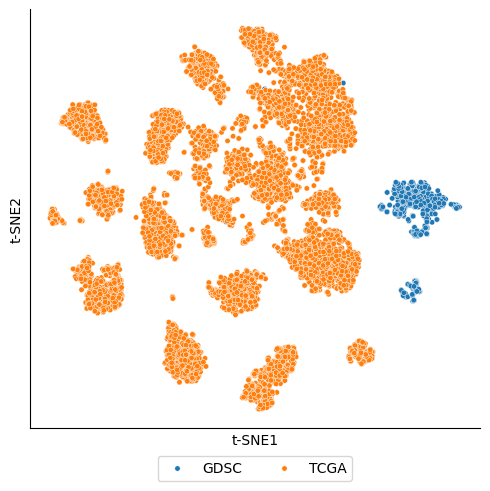

In [9]:
# visualization figure 2 (a) raw expression

plt.figure(figsize=(5, 5))
sns.scatterplot(x=0, y=1, hue='Data', data=tsen_raw_exp, palette='tab10', s=15)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
sns.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

/tmp/ipykernel_36296/1815754230.py:4: UserWarning: The palette list has more values (25) than needed (23), which may not be intended.
  sns.scatterplot(x=0, y=1, hue='Tissue_type', data=tsen_raw_exp, palette=palette, s=15)
/tmp/ipykernel_36296/1815754230.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


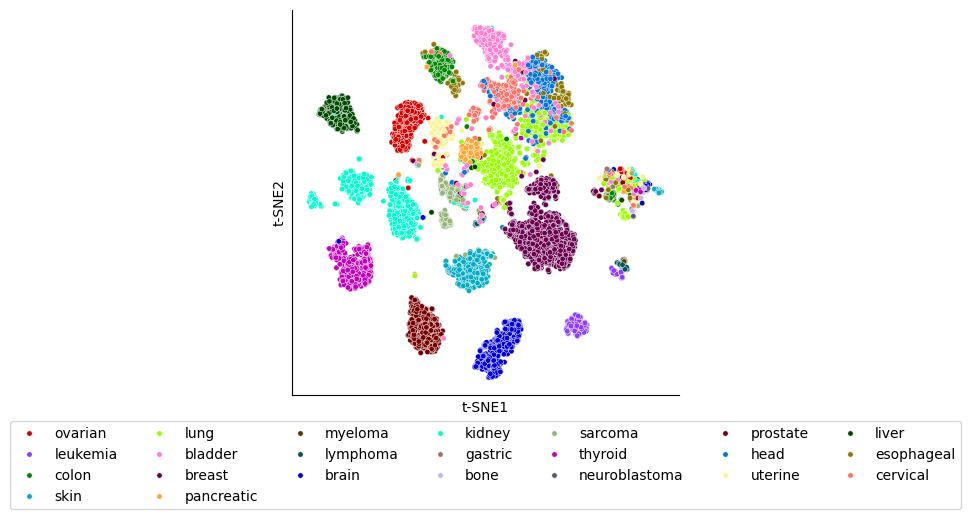

In [10]:
# visualization figure 2 (b) raw expression

plt.figure(figsize=(5, 5))
sns.scatterplot(x=0, y=1, hue='Tissue_type', data=tsen_raw_exp, palette=palette, s=15)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
sns.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

### Figure 2. THERAPI embedding space

In [11]:
tcga_latent_df = pd.concat([tcga_unlabeled_latent_df, tcga_labeled_latent_df]).loc[tcga_id_order]
tcga_info_df = pd.concat([tcga_unlabeled_info_df, tcga_labeled_info_df]).set_index('ID').loc[tcga_id_order].reset_index(drop=False)
tcga_latent_df.shape, tcga_info_df.shape

((8400, 128), (8400, 5))

In [12]:
therapi_latent_df = pd.concat([gdsc_latent_df, tcga_latent_df])
therapi_latent_df.shape

(9073, 128)

In [13]:
# dimensional reduction using t-SNE

tsne = TSNE(n_components=2, random_state=seed)
tsen_therapi_exp = pd.DataFrame(tsne.fit_transform(therapi_latent_df))
tsen_therapi_exp['Data'] = ['GDSC']*len(gdsc_data_df) + ['TCGA']*(len(tcga_latent_df))
tsen_therapi_exp['Tissue_type'] = gdsc_info_df['tissue_type'].tolist() + tcga_info_df['tissue_type'].tolist()

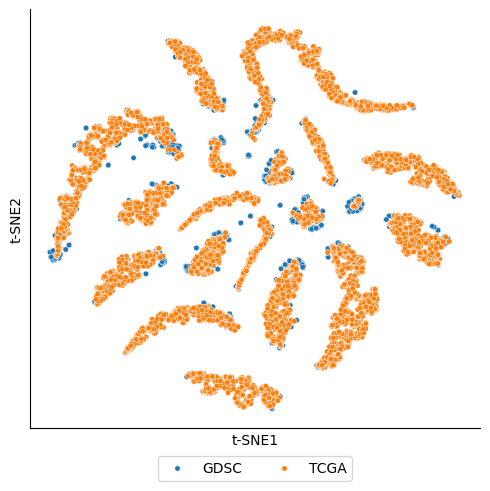

In [14]:
# visualization figure 2 (a) THERAPI

plt.figure(figsize=(5, 5))
sns.scatterplot(x=0, y=1, hue='Data', data=tsen_therapi_exp, palette='tab10', s=15)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
sns.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

/tmp/ipykernel_36296/126748375.py:4: UserWarning: The palette list has more values (25) than needed (23), which may not be intended.
  sns.scatterplot(x=0, y=1, hue='Tissue_type', data=tsen_therapi_exp, palette=palette, s=15)
/tmp/ipykernel_36296/126748375.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


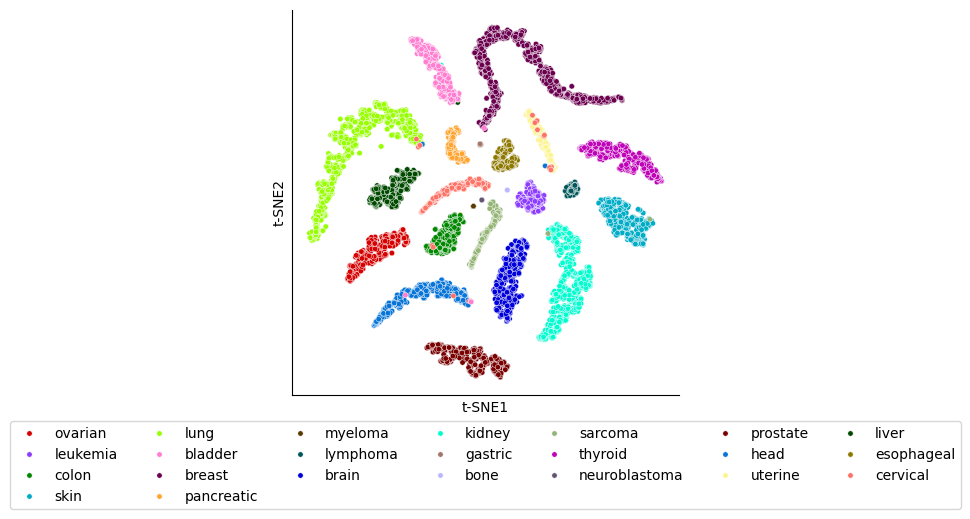

In [15]:
# visualization figure 2 (b) THERAPI

plt.figure(figsize=(5, 5))
sns.scatterplot(x=0, y=1, hue='Tissue_type', data=tsen_therapi_exp, palette=palette, s=15)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
sns.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7)
plt.xticks([])
plt.yticks([])
plt.tight_layout()